In [1]:
import SIRmodels as mdl
import analysisSI1I2R as an
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['figure.titlesize'] = 22
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['axes.titlesize'] = 18
matplotlib.rcParams['legend.fontsize'] = 18
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rc('font', family='serif')
import pickle as pkl

dirFigs = 'images/summary3/'

# SIR interactive model 

## Cooperation and competition

In [2]:
# Originals values
N = 100000
SIIR0 = np.zeros(9)
SIIR0[1] = 10
SIIR0[2] = 10
SIIR0[0] = N - np.sum(SIIR0[1:8])

t_start = 0
t_end = 30
n_int = 10000

t_sim = np.linspace(t_start, t_end, n_int)

In [ ]:
divisores = [100,0.01,1]
params = [6.15, 6.15, 5.5, 5.5, 6.15, 0, 5.5, 5.5] # independent case
beta_prime_arr = [2, 6.15, 15,40]


i=1
for div in divisores:
    j=1
    params_copy = params.copy()
    params_copy[6] = params[6]/div

    fig, ax = plt.subplots(2, 2)
    axins1 = zoomed_inset_axes(ax[0,0], 1.8, loc=1) # zoom-factor: 2.5, location: upper-right
    for beta2prime in beta_prime_arr:
        params_copy[5] = beta2prime
        siirSim = mdl.SIIR(SIIR0, params_copy, t_sim)
        siirSim.runEvaluation(norm=True)
        res = siirSim.getResult()
    
        inf1 = res[:, 1] + res[:, 3] + res[:, 7]
        rec1 = res[:, 4] + res[:, 6] + res[:, 8]
        inf2 = res[:, 2] + res[:, 3] + res[:, 6]
        rec2 = res[:, 5] + res[:, 7] + res[:, 8]

        ax[0,0].plot(t_sim, inf1,label=r"$\beta_2'$=" + str(beta2prime))
        axins1.plot(t_sim, inf1)
        ax[0,1].plot(t_sim, rec1)
        ax[1,0].plot(t_sim, inf2)
        ax[1,1].plot(t_sim, rec2)
  
    #ax[0,0].set_title(r"$P_{I_1}$")
    ax[0,0].set_xlabel(r"time")
    ax[0,0].set_ylabel(r"$P_{I_1}$")
    ax[0,0].annotate(r'\textbf{(a)}', xy=(0.05,0.75), xycoords="axes fraction",fontsize=18)
    ax[0,0].set_xticks(np.arange(0,31,10))
    ax[0,0].set_yticks(np.arange(0,0.012,0.0025))
    ax[0,0].set_ylim(0,0.011)
    # zoom window
    axins1.set_xlim(6, 11) # apply the x-limits
    axins1.set_ylim(0.0035,0.008) # apply the y-limits
    axins1.set_xticks([6,11])
    axins1.set_yticks([0.0035,0.008])
    axins1.tick_params(labelsize=11)
    mark_inset(ax[0,0], axins1, loc1=2, loc2=3, fc="none", ec="0.5")
    
    #ax[0,1].set_title(r"$P_{R_1}$")
    ax[0,1].set_xlabel(r"time")
    ax[0,1].set_ylabel(r"$P_{R_1}$")
    ax[0,1].annotate(r'\textbf{(b)}', xy=(0.05,0.75), xycoords="axes fraction",fontsize=18)
    ax[0,1].set_xticks(np.arange(0,31,10))
    ax[0,1].set_yticks(np.arange(0,0.26,0.05))
    #ax[1,0].set_title(r"$P_{I_2}$")
    ax[1,0].set_xlabel(r"time")
    ax[1,0].set_ylabel(r"$P_{I_2}$")
    ax[1,0].annotate(r'\textbf{(c)}', xy=(0.05,0.75), xycoords="axes fraction",fontsize=18)
    ax[1,0].set_xticks(np.arange(0,31,10))
    ax[1,0].set_yticks(np.arange(0,0.012,0.0025))
    ax[1,0].set_ylim(0,0.011)
    
    #ax[1,1].set_title(r"$P_{R_2}$")
    ax[1,1].set_xlabel(r"time")
    ax[1,1].set_ylabel(r"$P_{R_2}$")
    ax[1,1].annotate(r'\textbf{(d)}', xy=(0.05,0.75), xycoords="axes fraction",fontsize=18)
    ax[1,1].set_xticks(np.arange(0,31,10))
    ax[1,1].set_yticks(np.arange(0,0.26,0.05))
    
    fig.legend(loc=(0.88,0.66),fontsize=12)
    fig.set_size_inches(12,5)
    fig.tight_layout(w_pad=2.5)
    plt.savefig(dirFigs + "1-" + str(i) + ".svg")
    i+=1
    


## B' vs B'

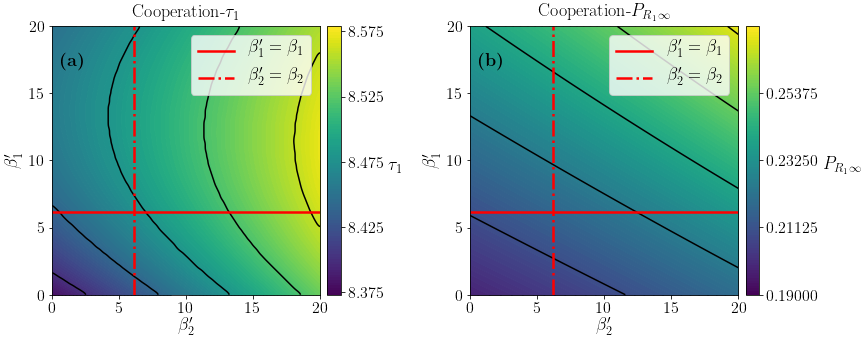

In [3]:
# Cooperation
###############
# Plot: Peak
params = [6.15, 6.15, 5.5, 5.5, 6.15, 6.15, 5.5, 5.5] # independent case
peak1 = pkl.load(open("coop_peak1.pkl",'rb'))
peak2 = pkl.load(open("coop_peak2.pkl",'rb'))
inf1 = pkl.load(open("coop_inf1.pkl",'rb'))
inf2 = pkl.load(open("coop_inf2.pkl",'rb'))

betaprime_arr = np.arange(0, 20.1, 0.1)
Beta2prime, Beta1prime = np.meshgrid(betaprime_arr, betaprime_arr)

fig, ax = plt.subplots(1, 2)
ax[0].set_xlabel(r"$\beta_2'$")
ax[0].set_xlim(np.min(betaprime_arr),np.max(betaprime_arr))
ax[0].set_ylabel(r"$\beta_1'$")
ax[0].set_ylim(np.min(betaprime_arr),np.max(betaprime_arr))
ax[0].set_title(r"Cooperation-$\tau_1$")
ax[0].set_aspect('equal')
ax[0].plot(betaprime_arr, params[0] * np.ones(len(betaprime_arr)), '-r',linewidth=2.5)
ax[0].plot(params[0] * np.ones(len(betaprime_arr)), betaprime_arr, '-.r',linewidth=2.5)
ax[0].legend((r"$\beta_1'=\beta_1$", r"$\beta_2'=\beta_2$"), fontsize=18)
ax[0].set_xticks(np.arange(0,20.0001,5))
ax[0].set_yticks(np.arange(0,20.0001,5))
ax[0].annotate(r'\textbf{(a)}', xy=(0.03,0.85), xycoords="axes fraction",fontsize=18)
from scipy.ndimage.filters import gaussian_filter
peak1 = gaussian_filter(peak1, 1.5)
ax[0].contour(Beta2prime, Beta1prime, peak1,5,colors='k')
cf1 = ax[0].contourf(Beta2prime, Beta1prime, peak1, np.arange(8.373,8.58,0.002))
#ax[0].contour(Beta1prime, Beta2prime, peak1, 10, colors='black')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
cb1 = fig.colorbar(cf1, cax=cax)
cb1.set_ticks(np.linspace(8.375,8.575,5))
cb1.set_label(r'$\tau_1$',rotation=0,labelpad=12)
cb1.solids.set_edgecolor("face")

# This is the fix for the white lines between contour levels
for c in cf1.collections:
    c.set_edgecolor("face")

# Plot: infected
ax[1].set_xlabel(r"$\beta_2'$")
ax[1].set_xlim(np.min(betaprime_arr),np.max(betaprime_arr))
ax[1].set_ylabel(r"$\beta_1'$")
ax[1].set_ylim(np.min(betaprime_arr),np.max(betaprime_arr))
ax[1].set_title(r"Cooperation-$P_{R_{1}\infty}$")
ax[1].set_aspect('equal')
ax[1].plot(betaprime_arr, params[0] * np.ones(len(betaprime_arr)), '-r',linewidth=2.5)
ax[1].plot(params[0] * np.ones(len(betaprime_arr)), betaprime_arr, '-.r',linewidth=2.5)
ax[1].legend((r"$\beta_1'=\beta_1$", r"$\beta_2'=\beta_2$"), fontsize=18)
ax[1].set_xticks(np.arange(0,20.0001,5))
ax[1].set_yticks(np.arange(0,20.0001,5))
ax[1].annotate(r'\textbf{(b)}', xy=(0.03,0.85), xycoords="axes fraction",fontsize=18)
#ax.plot(beta2_arr, params[0] * np.ones(len(beta2_arr)), '-r') 
#ax[0].legend(('Beta1', 'Beta2'), fontsize=fontsize)
ax[1].contour(Beta2prime, Beta1prime, inf1,5,colors='k')
cf1 = ax[1].contourf(Beta2prime, Beta1prime, inf1,np.arange(0.19,0.275,0.0008))
#ax[0].contour(Beta1prime, Beta2prime, peak1, 10, colors='black')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
cb1 = fig.colorbar(cf1, cax=cax)
cb1.set_ticks(np.linspace(0.19,0.275,5))
cb1.set_label(r'$P_{R_{1}\infty}$',rotation=0,labelpad=25)
cb1.solids.set_edgecolor("face")
# This is the fix for the white lines between contour levels
for c in cf1.collections:
    c.set_edgecolor("face")

fig.set_size_inches(12, 5)
fig.tight_layout(w_pad=3.5)
plt.savefig(dirFigs+'2-1.svg')




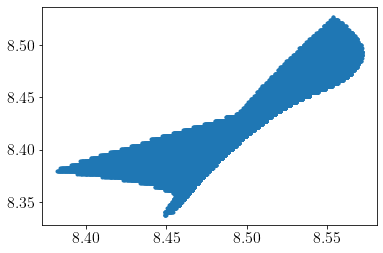

In [8]:
# Tau1 vs Tau2 Cooperation

fig,ax = plt.subplots(1,1)

peak1_arr = peak1.ravel()
peak2_arr = peak2.ravel()

ax.plot(peak1_arr,peak2_arr,'.')
fig.savefig(dirFigs + 'tau.svg')

In [ ]:
# Competitive
##############

peak1 = pkl.load(open("comp_peak1.pkl",'rb'))
peak2 = pkl.load(open("comp_peak2.pkl",'rb'))
inf1 = pkl.load(open("comp_inf1.pkl",'rb'))
inf2 = pkl.load(open("comp_inf2.pkl",'rb'))


# Plot: Peak
fig, ax = plt.subplots(1, 2)
ax[0].set_xlabel(r"$\beta_2'$")
ax[0].set_xlim(np.min(betaprime_arr),np.max(betaprime_arr))
ax[0].set_ylabel(r"$\beta_1'$")
ax[0].set_ylim(np.min(betaprime_arr),np.max(betaprime_arr))
ax[0].set_title(r"Competition-$\tau_1$")
ax[0].set_aspect('equal')
ax[0].plot(betaprime_arr, params[0] * np.ones(len(betaprime_arr)), '-r',linewidth=2.5)
ax[0].plot(params[0] * np.ones(len(betaprime_arr)), betaprime_arr, '-.r',linewidth=2.5)
ax[0].legend((r"$\beta_1'=\beta_1$", r"$\beta_2'=\beta_2$"), fontsize=18)
ax[0].annotate(r'\textbf{(c)}', xy=(0.03,0.85), xycoords="axes fraction",fontsize=18)
from scipy.ndimage.filters import gaussian_filter
peak1 = gaussian_filter(peak1, 1.5)
ax[0].contour(Beta2prime, Beta1prime, peak1,5,colors='k')
cf1 = ax[0].contourf(Beta2prime, Beta1prime, peak1, np.arange(8.04,8.40,0.003))
ax[0].set_xticks(np.arange(0,20.0001,5))
ax[0].set_yticks(np.arange(0,20.0001,5))
#ax[0].contour(Beta1prime, Beta2prime, peak1, 10, colors='black')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
cb1 = fig.colorbar(cf1, cax=cax)
cb1.set_ticks(np.linspace(8.04,8.4,5))
cb1.set_label(r'$\tau_1$',rotation=0,labelpad=12)
cb1.solids.set_edgecolor("face")
for c in cf1.collections:
    c.set_edgecolor("face")
    
    
# Plot: infected
ax[1].set_xlabel(r"$\beta_2'$")
ax[1].set_xlim(np.min(betaprime_arr),np.max(betaprime_arr))
ax[1].set_ylabel(r"$\beta_1'$")
ax[1].set_ylim(np.min(betaprime_arr),np.max(betaprime_arr))
ax[1].set_title(r"Competition-$P_{R_{1}\infty}$")
ax[1].set_aspect('equal')
ax[1].plot(betaprime_arr, params[0] * np.ones(len(betaprime_arr)), '-r',linewidth=2.5)
ax[1].plot(params[0] * np.ones(len(betaprime_arr)), betaprime_arr, '-.r',linewidth=2.5)
ax[1].legend((r"$\beta_1'=\beta_1$", r"$\beta_2'=\beta_2$"), fontsize=18)
ax[1].set_xticks(np.arange(0,20.0001,5))
ax[1].set_yticks(np.arange(0,20.0001,5))
ax[1].annotate(r'\textbf{(d)}', xy=(0.03,0.85), xycoords="axes fraction",fontsize=18)
#ax.plot(beta2_arr, params[0] * np.ones(len(beta2_arr)), '-r') 
#ax[0].legend(('Beta1', 'Beta2'), fontsize=fontsize)
ax[1].contour(Beta2prime, Beta1prime, inf1,5,colors='k')
cf1 = ax[1].contourf(Beta2prime, Beta1prime, inf1,np.arange(0.177,0.201,0.00023))
#ax[0].contour(Beta1prime, Beta2prime, peak1, 10, colors='black')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
cb1 = fig.colorbar(cf1, cax=cax)
cb1.set_label(r'$P_{R_{1}\infty}$',rotation=0,labelpad=25)
cb1.solids.set_edgecolor("face")
cb1.set_ticks(np.linspace(0.177,0.201,5,5))
for c in cf1.collections:
    c.set_edgecolor("face")

fig.set_size_inches(12, 5)
fig.tight_layout(w_pad=2.5)
plt.savefig(dirFigs + "2-2.svg")

In [ ]:
#params = [6.15, 6.15, 5.5, 5.5, 0, 0, 5.5/100, 5.5] # cooperative case
params = [6.15, 6.15, 5.5, 5.5, 0, 0, 5.5/0.01, 5.5] # competitive case

# Peak
#######
betaprime_arr = np.arange(0, 20.1, 0.1)
params_copy = params.copy()
Beta2prime, Beta1prime = np.meshgrid(betaprime_arr, betaprime_arr)

peak1 = np.zeros((len(betaprime_arr), len(betaprime_arr)))
peak2 = np.zeros((len(betaprime_arr), len(betaprime_arr)))
inf1 = np.zeros((len(betaprime_arr), len(betaprime_arr)))
inf2 = np.zeros((len(betaprime_arr), len(betaprime_arr)))
for j in np.arange(len(betaprime_arr)):
    beta2prime = betaprime_arr[j]
    params_copy[5] = beta2prime
    for i in np.arange(len(betaprime_arr)):
        beta1prime = betaprime_arr[i]
        print("(beta1prime,beta2prime)", beta1prime, beta2prime)
        params_copy[4] = beta1prime
        siir = mdl.SIIR(SIIR0, params_copy, t_sim)
        siir.runEvaluation(norm=True)
        #peak1[i, j] = t_sim[siir.getDisease1()[1]][0] # getPeak1
        #peak2[i, j] = t_sim[siir.getDisease2()[1]][0] # getPeak2
        peak1[i, j] = 0 if siir.getDisease1()[1].size==0 else t_sim[siir.getDisease1()[1]][0] # getPeak1
        peak2[i, j] = 0 if siir.getDisease2()[1].size==0 else t_sim[siir.getDisease2()[1]][0]
        inf1[i, j] = siir.getNInfected1() # n infected 1
        inf2[i, j] = siir.getNInfected2() # n infected 2

import pickle as pkl

#nameFile = "coop_" 
nameFile = "comp_" 
pkl_file = open(nameFile + 'peak1.pkl', 'wb')
pkl.dump(peak1,pkl_file)
pkl_file.close()
pkl_file = open(nameFile + 'peak2.pkl', 'wb')
pkl.dump(peak2,pkl_file)
pkl_file.close()
pkl_file = open(nameFile + 'inf1.pkl', 'wb')
pkl.dump(inf1,pkl_file)
pkl_file.close()
pkl_file = open(nameFile + 'inf2.pkl', 'wb')
pkl.dump(inf2,pkl_file)
pkl_file.close()


## Enhance and diminish (synch)

In [ ]:
# Originals values
N = 100000
SIIR0 = np.zeros(9)
SIIR0[1] = 10
SIIR0[2] = 10
SIIR0[0] = N - np.sum(SIIR0[1:8])

t_start = 0
t_end = 50
n_int = 10000

t_sim = np.linspace(t_start, t_end, n_int)

In [ ]:
delta1PrimeParams = [0.3, 19.5, 5.5] # [synch,asynch,ind]
params = [6.15, 0, 5.5, 0, 6.15, 0, 0, 0]  # Independent case
beta_prime_arr = np.array([2,  6.15, 12,20])
delta_prime_arr = beta_prime_arr/1.12

i=1
for delta1prime in delta1PrimeParams:
    params_copy = params.copy()
    params_copy[6] = delta1prime
    fig, ax = plt.subplots(2, 2)
    axins1 = zoomed_inset_axes(ax[0,0], 3.2, loc=1) # zoom-factor: 2.5, location: upper-right
    for j in range(len(beta_prime_arr)):
        params_copy[1] = beta_prime_arr[j]
        params_copy[5] = beta_prime_arr[j]
        params_copy[3] = delta_prime_arr[j]
        params_copy[7] = delta_prime_arr[j]
        
        siirSim = mdl.SIIR(SIIR0, params_copy, t_sim)
        siirSim.runEvaluation(norm=True)
        res = siirSim.getResult()
        
        inf1 = res[:, 1] + res[:, 3] + res[:, 7]
        rec1 = res[:, 4] + res[:, 6] + res[:, 8]
        inf2 = res[:, 2] + res[:, 3] + res[:, 6]
        rec2 = res[:, 5] + res[:, 7] + res[:, 8]
        
        ax[0,0].plot(t_sim, inf1, label=r'$\beta_2$=' + str(round(beta_prime_arr[j],2)) 
                                     + r', $\delta_2$=' + str(round(delta_prime_arr[j],2)))
        axins1.plot(t_sim, inf1)
        ax[0,1].plot(t_sim, rec1)
        ax[1,0].plot(t_sim, inf2)
        ax[1,1].plot(t_sim, rec2)

    #ax[0,0].set_title(r"$P_{I_{1}}$")
    ax[0,0].set_xlabel(r"time")
    ax[0,0].set_ylabel(r"$P_{I_1}$")
    ax[0,0].annotate(r'\textbf{(a)}', xy=(0.005,0.75), xycoords="axes fraction",fontsize=18)
    ax[0,0].set_xticks(np.arange(0,51,10))
    ax[0,0].set_yticks(np.arange(0,0.0085,0.0015))
    # zoom window
    axins1.set_xlim(6.5, 10) # apply the x-limits
    axins1.set_ylim(0.005,0.0068) # apply the y-limits
    axins1.set_xticks([7,10])
    axins1.set_yticks([0.005,0.0068])
    axins1.tick_params(labelsize=13)
    mark_inset(ax[0,0], axins1, loc1=2, loc2=3, fc="none", ec="0.5")
    
    #ax[0,1].set_title(r"$P_{R_{1}}$")
    ax[0,1].set_xlabel(r"time")
    ax[0,1].set_ylabel(r"$P_{R_{1}}$",)
    ax[0,1].annotate(r'\textbf{(b)}', xy=(0.005,0.75), xycoords="axes fraction",fontsize=18)
    ax[0,1].set_xticks(np.arange(0,51,10))
    ax[0,1].set_yticks(np.arange(0,0.22,0.05))

    #ax[1,0].set_title(r"$P_{I_{2}}$")
    ax[1,0].set_xlabel(r"time")
    ax[1,0].set_ylabel(r"$P_{I_2}$")
    ax[1,0].annotate(r'\textbf{(c)}', xy=(0.005,0.75), xycoords="axes fraction",fontsize=18)
    ax[1,0].set_xticks(np.arange(0,51,10))
    ax[1,0].set_yticks(np.arange(0,0.0085,0.0015))

    #ax[1,1].set_title(r"$P_{R_{2}}$")
    ax[1,1].set_xlabel(r"time")
    ax[1,1].set_ylabel(r"$P_{R_2}$")
    ax[1,1].annotate(r'\textbf{(d)}', xy=(0.005,0.75), xycoords="axes fraction",fontsize=18)
    ax[1,1].set_xticks(np.arange(0,51,10))
    ax[1,1].set_yticks(np.arange(0,0.22,0.05))
    fig.legend(loc=(0.77,0.65),fontsize=16)
    fig.set_size_inches(12,5)
    fig.tight_layout(w_pad=2.5)
    plt.savefig(dirFigs+ "3-" + str(i) + ".svg") 
    i+=1

## B2' vs D1'

In [ ]:
params = [6.15, 0, 5.5, 0, 6.15, 0, 5.5, 0]
beta2_arr = np.arange(0,20.1,0.1)
delta1prime_arr = np.arange(0,20.1,0.1)
rate = 1.12
Delta1prime, Beta2 = np.meshgrid(delta1prime_arr,beta2_arr)

peak1 = pkl.load(open("synch_peak1.pkl",'rb'))
peak2 = pkl.load(open("synch_peak2.pkl",'rb'))
inf1 = pkl.load(open("synch_inf1.pkl",'rb'))
inf2 = pkl.load(open("synch_inf2.pkl",'rb'))

# Plot: Peak
fig, ax = plt.subplots(1, 2)
ax[0].set_xlabel(r"$\delta_1'$",fontsize=20)
ax[0].set_xlim(np.min(delta1prime_arr),np.max(delta1prime_arr)+0.001)
ax[0].set_ylabel(r"$\beta_2$")
ax[0].set_ylim(np.min(beta2_arr),np.max(beta2_arr))
ax[0].set_title(r"$\tau_1$",fontsize=24)
ax[0].set_aspect('equal')
ax[0].plot(params[6] * np.ones(len(delta1prime_arr)), delta1prime_arr, '-.r',linewidth=2.5,
       label=r"$\delta_1'=\delta_1$")  
ax[0].legend(fontsize=18)
ax[0].set_xticks(np.arange(0,20.0001,5))
ax[0].set_yticks(np.arange(0,20.0001,5))
from scipy.ndimage.filters import gaussian_filter
peak1 = gaussian_filter(peak1, 1.5)
ax[0].contour(Delta1prime, Beta2, peak1,5,colors='k')
cf1 = ax[0].contourf( Delta1prime,Beta2, peak1, np.arange(8.12,8.68,0.005))
ax[0].annotate(r'\textbf{(a)}', xy=(0.1,0.85), xycoords="axes fraction",fontsize=18)
#ax[0].contour(Beta1prime, Beta2prime, peak1, 10, colors='black')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
cb1 = fig.colorbar(cf1, cax=cax)
cb1.set_ticks(np.linspace(8.120,8.68,5))
cb1.set_label(r"$\tau_1$",rotation=0,labelpad=12)
for c in cf1.collections:
    c.set_edgecolor("face")
ax[0].plot([0.3],[5.5],'or',[params[2]],[5.5],'xw',[19.5],[5.5],'sy', ms=10)

# Plot: infected
ax[1].set_xlabel(r"$\delta_1'$",fontsize=20)
ax[1].set_xlim(np.min(delta1prime_arr),np.max(delta1prime_arr))
ax[1].set_ylabel(r"$\beta_2$")
ax[1].set_ylim(np.min(beta2_arr),np.max(beta2_arr))
ax[1].set_title(r"$P_{R_{1}\infty}$",fontsize=20)
ax[1].set_aspect('equal')
ax[1].plot(params[6] * np.ones(len(delta1prime_arr)), delta1prime_arr, '-.r',linewidth=2.5,
       label=r"$\delta_1'=\delta_1$")
ax[1].legend(fontsize=18)
ax[1].set_xticks(np.arange(0,20.0001,5))
ax[1].set_yticks(np.arange(0,20.0001,5))
ax[1].annotate(r'\textbf{(b)}', xy=(0.1,0.85), xycoords="axes fraction",fontsize=18)
#ax[0].legend(('Beta1', 'Beta2'), fontsize=fontsize)
#ax.legend(r"$\delta_1'=\delta_1$", fontsize=18)
ax[1].contour(Delta1prime, Beta2, inf1,5,colors='k')
cf1 = ax[1].contourf( Delta1prime,Beta2, inf1, np.arange(0.196,0.2265,0.0003))
#ax[0].contour(Beta1prime, Beta2prime, peak1, 10, colors='black')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
cb1 = fig.colorbar(cf1, cax=cax)
cb1.set_label(r"$P_{R_{1}\infty}$",rotation=0,labelpad=25)
cb1.set_ticks(np.linspace(0.196,0.226,5))
for c in cf1.collections:
    c.set_edgecolor("face")
ax[1].plot([0.3],[5.5],'or',[params[2]],[5.5],'xw',[19.5],[5.5],'sy', ms=10)


fig.set_size_inches(12,5)
fig.tight_layout(w_pad=2.5)
plt.savefig(dirFigs+"4-1.svg")

## Parameter explanation

In [ ]:
# Originals values
N = 100000
SIIR0 = np.zeros(9)
SIIR0[1] = 10
SIIR0[2] = 10
SIIR0[0] = N - np.sum(SIIR0[1:8])

t_start = 0
t_end = 18
n_int = 100000

t_sim = np.linspace(t_start, t_end, n_int)

In [ ]:
delta1PrimeParams = [0.3, 19.5, 5.5] # [synch,asynch,ind]
params = [0,1,0,1,0,1,0,1]  # Independent case
beta_prime_arr = np.array([5, 10])
delta_prime_arr = beta_prime_arr/1.12

params_copy = params.copy()

fig, ax = plt.subplots(1,2)
peak = []
timePeak = []
for j in range(len(beta_prime_arr)):
    params_copy[0] = beta_prime_arr[j]
    params_copy[4] = beta_prime_arr[j]
    params_copy[2] = delta_prime_arr[j]
    params_copy[6] = delta_prime_arr[j]

    siirSim = mdl.SIIR(SIIR0, params_copy, t_sim)
    siirSim.runEvaluation(norm=True)
    res = siirSim.getResult()

    inf1 = res[:, 1] + res[:, 3] + res[:, 7]
    rec1 = res[:, 4] + res[:, 6] + res[:, 8]

    peak.append(siirSim.getDisease1()[0][siirSim.getDisease1()[1]])
    timePeak.append(0 if siirSim.getDisease1()[1].size==0 else t_sim[siirSim.getDisease1()[1]][0])
    ax[0].plot(t_sim, siirSim.getDisease1()[0],'k')
    ax[0].scatter([0 if siirSim.getDisease1()[1].size==0 else t_sim[siirSim.getDisease1()[1]][0]],
             [siirSim.getDisease1()[0][siirSim.getDisease1()[1]]], marker='o', color='red')
    ax[0].vlines(0 if siirSim.getDisease1()[1].size==0 else t_sim[siirSim.getDisease1()[1]][0],
              0, siirSim.getDisease1()[0][siirSim.getDisease1()[1]], lw=2, color='r',
             linestyles='dashed')
    

    
ax[0].set_xticks(timePeak)
ax[0].text(timePeak[0]+0.00003, peak[0]+0.00003, r"$P_{I_2 \textrm{max}}$", fontsize=16)
ax[0].text(timePeak[1]+0.00003, peak[1]+0.00003, r"$P_{I_1 \textrm{max}}$", fontsize=16)
#ax.text(timePeak[1]+0.3, peak[1]+0.3, "hola", fontsize=9)
ax[0].set_xticklabels([r'$\tau_2$',r'$\tau_1$'], fontsize=20)
#ax[0].set_xlabel(r"time")
ax[0].set_title(r"$P_I$",fontsize=20)
ax[0].set_yticks([])
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].annotate(s='', xy=(timePeak[0],peak[0]), xytext=(timePeak[1],peak[1]), arrowprops=dict(arrowstyle='<->'))

ax[1].plot(t_sim,rec1,'k')
ax[1].hlines(rec1[-1]+0.001,0,18,color='r',
             linestyles='dashed')
ax[1].set_title(r"$P_R$",fontsize=20)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].text(0, rec1[-1]+0.005, r"$P_{R1 \infty }$", fontsize=17)

fig.set_size_inches(12,5)
fig.tight_layout(w_pad=2.5)
fig.savefig(dirFigs + '/5-1.svg')